## Bayesian Programming - Breakout

**Python for Data Science (J. Bloom, UC Berkeley, 2018-2022)**

Let's look at what our belief about the probability of getting a hot padrón pepper is as we eat.

<img width="50%" src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Pimientos_de_padron_amb_sal_maldon.jpg">

*Os pementos de Padrón, uns pican e outros non* ("Padrón peppers, some are hot, some are not") -- [Wikipedia](https://en.wikipedia.org/wiki/Padr%C3%B3n_peppers)

0) Here's some generated pepper-eating data (just execute the cell). The number 1 means hot, 0 means normal.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")

#p_hot_true = NOT TELLING YOU!
#rnd = np.random.RandomState(100)
#pepper_sample  = rnd.binomial(n=1, p=p_hot_true, size=(50,))

pepper_sample = np.array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1])

1) Pick a reasonable (non-informative) prior for $\theta =$"typical hot fraction"

In [9]:
x_theta = np.linspace(0, 1, 101)

alpha_0 = 10
beta_0 = 10

def prior(alpha=alpha_0, beta=beta_0):
    p_theta = stats.beta(alpha, beta).pdf(x_theta)
    return p_theta

Text(0, 0.5, '$p(\\theta)$')

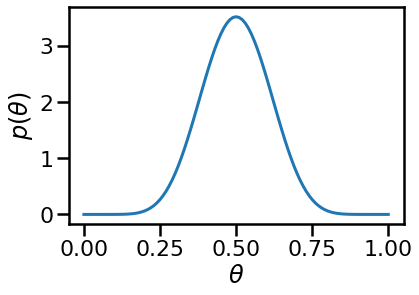

In [10]:
ax, = plt.plot(x_theta, prior())
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")

2) What does the posterior look like after 0, 1, 5, 10, 25, 50 samples?

In [4]:
n_samples = [0, 1, 5, 10, 25, 50]

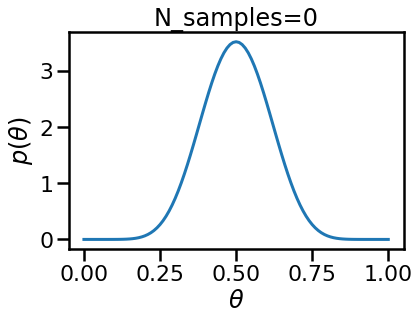

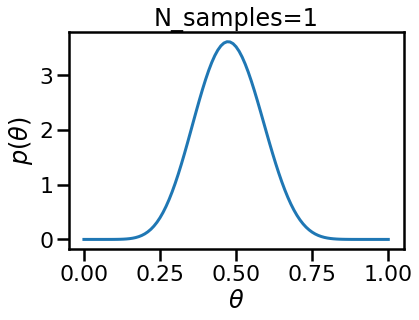

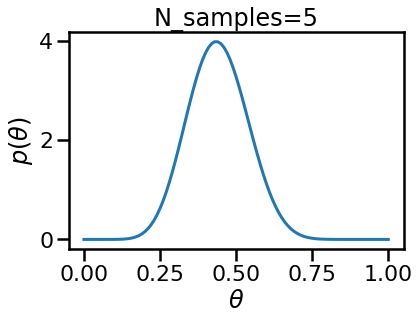

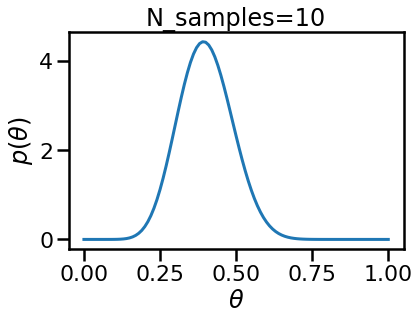

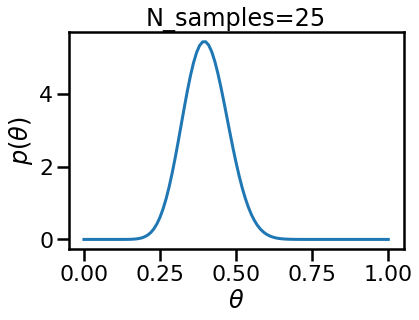

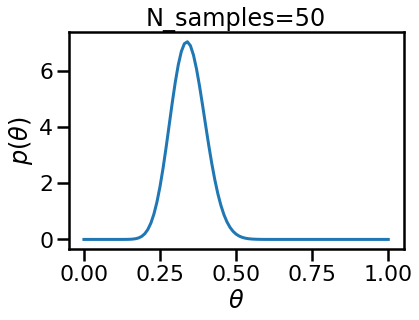

In [18]:
for n in n_samples:
    f = plt.figure()
    
    ## FIXME 
    p_theta = stats.beta(alpha_0 + sum(pepper_sample[:n]), beta_0 + n - sum(pepper_sample[:n])).pdf(x_theta)

    
    ax, = plt.plot(x_theta, p_theta)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$p(\theta)$")
    plt.title(f"N_samples={n}")

3) You can get the median and the 68% confidence region using `.median` and `.interval(0.68)` methods of the Beta function. What are the median expecations for the different sample sizes and their intervals? Does the confidence consistently contain the "correct" answer?

In [ ]:
for n in n_samples:
    
    #FIXME
    print(f"N({n}) median={median:0.2} interval(0.68)=[{interval[0]:0.3}, {interval[1]:0.3}]")